In [2]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation

In [5]:
#Import insurance data
policies = pd.read_excel(r'C:\Users\gediminas.gruodis\OneDrive - IDAVANG\Darbalaukis\insur\policies.xlsx')
claims = pd.read_excel(r'C:\Users\gediminas.gruodis\OneDrive - IDAVANG\Darbalaukis\insur\claims.xlsx')

In [6]:
#View policies data
policies.head()

,policyid,Country,VehicleType,VehicleUsage,Power,Weight,Colour,VehicleFirstRegistrationYear,VehicleAge,Mark,Model,EngineType,RenewalIndicator,Leasing,Deductible_general,Deductible_glass,premium,suminsured,policy_period_in_years,year
0,1,LV,Passenger car,Regular,77,1940,Gaiši bruna,2007,6,VOLKSWAGEN,JETTA,Diesel,0,0,142.29,42.69,250.9,8140.0,1.000000,2013
1,2,LV,Passenger car,Regular,85,2500,Tumši zila,2001,12,VOLKSWAGEN,SHARAN,Diesel,0,0,142.29,42.69,109.5,5710.0,0.575342,2013
2,3,LV,Passenger car,Regular,110,2180,Melna,2006,8,OPEL,VECTRA STATION WAGON,Diesel,0,0,140.00,70.00,284.5,6460.0,1.000000,2014
3,4,LV,Passenger car,Regular,103,2210,Tumši peleka,2012,2,VOLKSWAGEN,PASSAT,Diesel,1,1,142.29,42.69,525.4,22190.0,1.000000,2014
4,5,LV,Passenger car,Regular,70,1460,Melna,2007,6,MITSUBISHI,COLT,Benzine,1,0,140.00,70.00,348.9,4500.0,1.000000,2013


In [7]:
#View claims data
claims.head()

,claimid,policyid,IncurredAmount,ClaimType
0,1,1,197.6,Other
1,2,1,354.4,Accident
2,3,3,408.9,Glass
3,4,3,1276.0,Accident
4,5,4,389.4,Glass


In [8]:
#Combine everything into one dataset
insurance = policies.merge(claims, on = 'policyid', how = 'left')
insurance.head()

,policyid,Country,VehicleType,VehicleUsage,Power,Weight,Colour,VehicleFirstRegistrationYear,VehicleAge,Mark,...,Leasing,Deductible_general,Deductible_glass,premium,suminsured,policy_period_in_years,year,claimid,IncurredAmount,ClaimType
0,1,LV,Passenger car,Regular,77,1940,Gaiši bruna,2007,6,VOLKSWAGEN,...,0,142.29,42.69,250.9,8140.0,1.000000,2013,1.0,197.6,Other
1,1,LV,Passenger car,Regular,77,1940,Gaiši bruna,2007,6,VOLKSWAGEN,...,0,142.29,42.69,250.9,8140.0,1.000000,2013,2.0,354.4,Accident
2,2,LV,Passenger car,Regular,85,2500,Tumši zila,2001,12,VOLKSWAGEN,...,0,142.29,42.69,109.5,5710.0,0.575342,2013,NaN,NaN,NaN
3,3,LV,Passenger car,Regular,110,2180,Melna,2006,8,OPEL,...,0,140.00,70.00,284.5,6460.0,1.000000,2014,3.0,408.9,Glass
4,3,LV,Passenger car,Regular,110,2180,Melna,2006,8,OPEL,...,0,140.00,70.00,284.5,6460.0,1.000000,2014,4.0,1276.0,Accident


In [19]:
policies_by_year = policies.groupby('year').sum()
policies_by_year

,policyid,Power,Weight,VehicleFirstRegistrationYear,VehicleAge,RenewalIndicator,Leasing,Deductible_general,Deductible_glass,premium,suminsured,policy_period_in_years
year,,,,,,,,,,,,
2012,14532393,336421,6886312,6281451,10073,1995,1911,644707.11,211302.36,1265970.0,58506260.0,2630.764384
2013,13818180,338117,6769388,6093807,9609,1921,1770,566476.48,203001.33,1213137.3,62870440.0,2524.386301
2014,14574172,355240,6881749,6245425,10059,1926,1824,635681.57,207676.22,1282825.9,68315600.0,2581.594521


## 2. Sales Analysis

### 2.1 Sales by Year

<Figure size 864x432 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

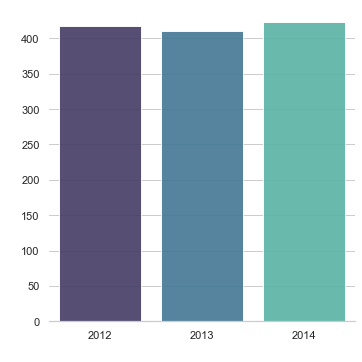

In [159]:
#Set style
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})
font = {'fontname':'Helvetica'}
plt.figure(figsize =(12, 6))
plt.figure(dpi=1200)

#Plot data
g = sns.catplot(data=insurance,
            kind="bar",
            x="year",
            y="premium",
            
            palette="mako",
            ci=None,
            alpha=0.9)

#Add/remove text
g.despine(left=True)
#g.legend.set_title("")
g.set_axis_labels(" ", " ", fontsize=12)
#g.set(yticks=[])
#g.fig.suptitle("Premium by vechicle types", fontsize=16)

#Save as SVG for presentation
plt.savefig('Sales_Year.svg')
plt.show()

### 2.2. Sales by Vechicle Type

<Figure size 720x504 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

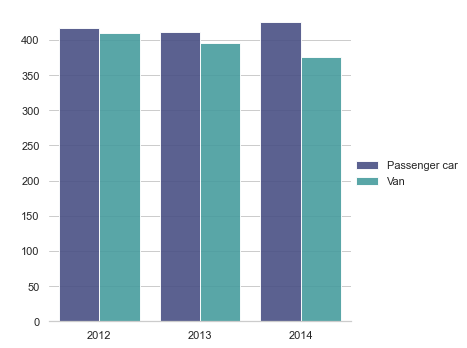

In [160]:
#Set style
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})
font = {'fontname':'Helvetica'}
plt.figure(figsize =(10, 7))
plt.figure(dpi=1200)

#Plot data
g = sns.catplot(data=insurance,
            kind="bar",
            x="year",
            y="premium",
            hue="VehicleType",
            palette="mako",
            ci=None,
            alpha=0.9)

#Add/remove text
g.despine(left=True)
g.legend.set_title("")
g.set_axis_labels("", " ", fontsize=12)
#g.set(yticks=[])
#g.fig.suptitle("Premium by vechicle types", fontsize=16)

#Save as SVG for presentation
plt.savefig('Sales_Vechicle_Type.svg')
plt.show()

### 2.3. Sales by Vechicle Usage

<Figure size 720x504 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

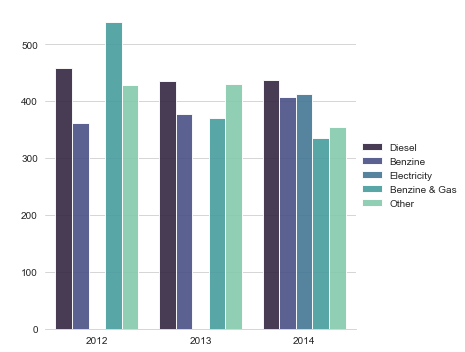

In [43]:
#Set style
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})
sns.set_style('whitegrid')
plt.figure(figsize =(10, 7))
plt.figure(dpi=1200)

#Plot data
g = sns.catplot(data=insurance,
            kind='bar',
            x='year',
            y='premium',
            hue='EngineType",
            palette="mako",
            ci=None,
            alpha=0.9)

#Add/remove text
g.despine(left=True)
g.legend.set_title("")
g.set_axis_labels("", " ", fontsize=12)
#g.set(yticks=[])
#g.fig.suptitle("Premium by vechicle types", fontsize=16)

#Save as SVG for presentation
plt.savefig('Sales_Vechicle_Usage.svg')
plt.show()

### 2.4. Sales by Engine Type

<Figure size 720x504 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

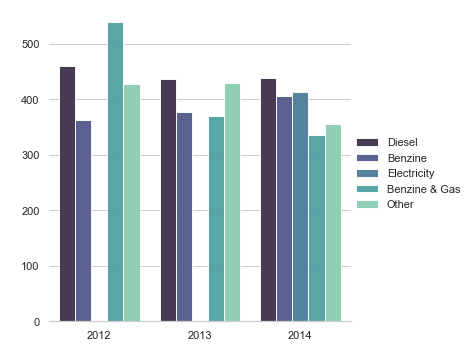

In [163]:
#Set style
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})
font = {'fontname':'Helvetica'}
plt.figure(figsize =(10, 7))
plt.figure(dpi=1200)

#Plot data
g = sns.catplot(data=insurance,
            kind="bar",
            x="year",
            y="premium",
            hue="EngineType",
            palette="mako",
            ci=None,
            alpha=0.9)

#Add/remove text
g.despine(left=True)
g.legend.set_title("")
g.set_axis_labels("", " ", fontsize=12)
#g.set(yticks=[])
#g.fig.suptitle("Premium by vechicle types", fontsize=16)

#Save as SVG for presentation
plt.savefig('Sales_Engine_Type.svg')
plt.show()

### 3. Claims Analysis

<Figure size 720x504 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

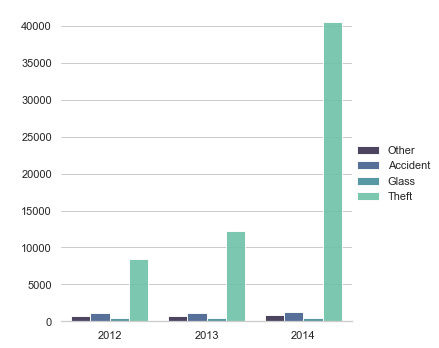

In [164]:
#Set style
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})
font = {'fontname':'Helvetica'}
plt.figure(figsize =(10, 7))
plt.figure(dpi=1200)

#Plot data
g = sns.catplot(data=insurance,
            kind="bar",
            x="year",
            y="IncurredAmount",
            hue="ClaimType",
            palette="mako",
            ci=None,
            alpha=0.9)

#Add/remove text
g.despine(left=True)
g.legend.set_title("")
g.set_axis_labels("", " ", fontsize=12)
#g.set(yticks=[])
#g.fig.suptitle("Premium by vechicle types", fontsize=16)

#Save as SVG for presentation
plt.savefig('Claims_Claim_Type.svg')
plt.show()

<Figure size 720x504 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

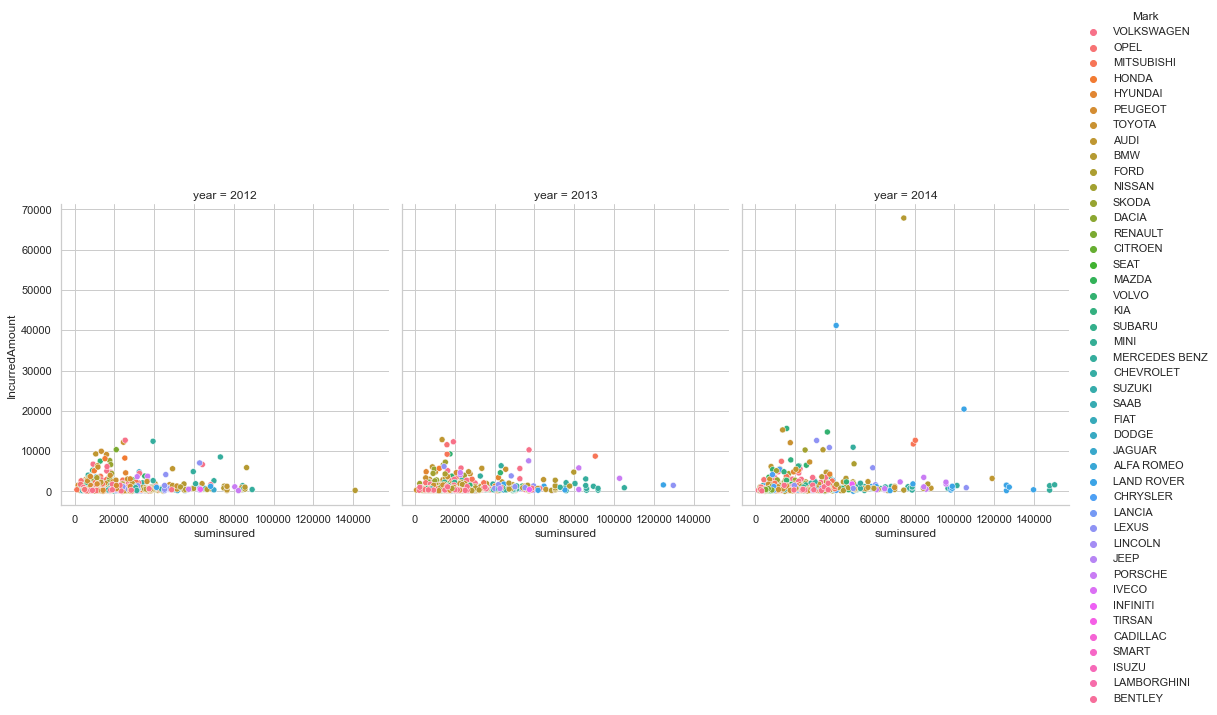

In [174]:
#Set style
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})
font = {'fontname':'Helvetica'}
plt.figure(figsize =(10, 7))
plt.figure(dpi=1200)

sns.relplot(
    data=insurance, x="suminsured", y="IncurredAmount",
    col="year", hue="Mark",
    
    kind="scatter"
)
